### Problem 1

In [1]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
r0 = 5 # Initial rabbit population
w0 = 3 # Initial wolf population
# Define rabbit growth paramters
a = 1.0
alpha = 0.5
# Define wolf growth parameters
c = 0.75
gamma = 0.25
t_f = 20 # How long we want to run the model
y0 = [r0, w0]
# Initialize time and output arrays needed for the ode solver
t = np.linspace(0, t_f, 5*t_f)
y = np.zeros((len(t), len(y0)))
y[0,:] = y0

In [3]:
def predator_prey(t, y, a, alpha, c, gamma):
    '''
    Parameters:
    --------------
    t: time variable.
    y: a tuple of length len(y0) representing current wolf and rabbit
        populations at time t (r(t) , w(t)).
    a, alpha, c, gamma: growth parameters. These are keyword arguments and
             can be of any length.
    Return:
    --------
    The list [ dr/dt , dw/dt ].
    '''
    return [ y[0]*(a-alpha*y[1]) , y[1]*(-c+gamma*y[0]) ]

In [4]:
predator_prey_ode = lambda t,y : predator_prey(t,y,a,alpha,c,gamma)
p_p_solver = ode(predator_prey_ode).set_integrator('dopri5')
p_p_solver.set_initial_value(y0,0)

In [5]:
for j in range(1,len(t)) :
    y[j,:] = p_p_solver.integrate((t[j]))

### Problem 2

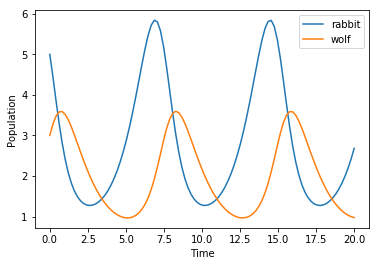

In [6]:
plt.plot(t, y[:,0], label='rabbit')
plt.plot(t, y[:,1], label='wolf')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

### Problem 3

In [7]:
from math import log
# Fixed Constants:
rho_F = 9400.
rho_L = 1800.
gamma_F = 3.2
gamma_L = 22.
eta_F = 180.
eta_L = 230.
C = 10.4 # Forbes constant
beta_AT = 0.14 # Adaptive Thermogenesis beta_TEF = 0.1 # Thermic Effect of Feeding
K=0

def forbes(F): # Returns p(t) for a specific t (1.5)
    C1 = C * rho_L / rho_F
    return C1 / (C1 + F)

def energy_balance(F, L, EI, PAL):
    p = forbes(F)
    a1 = (1. / PAL - beta_AT) * EI - K - gamma_F * F - gamma_L * L # EB numerator   (1.9)
    a2 = (1 - p) * eta_F / rho_F + p * eta_L / rho_L + 1. / PAL    # EB denominator (1.9)
    return a1 / a2

def weight_odesystem(t, y, EI, PAL):
    F, L = y[0], y[1]
    p, EB = forbes(F), energy_balance(F, L, EI, PAL)
    return [(1 - p) * EB / rho_F , p * EB / rho_L]

def fat_mass(BW, age, H, sex): # (1.7)
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100

In [8]:
# Helper unit conversion functions
def lbs_to_kg(lbs) :
    return 0.45359237*lbs

def kg_to_lbs(kg) :
    return 2.20462262185*kg

def in_to_m(inches) :
    return .0254*inches

def m_to_in(m) :
    return 39.370079*m

In [9]:
# Problem 3
# Initial conditions
age = 38
sex = 'I can put anything I want here'
height = in_to_m(5*12 + 8)
weight = lbs_to_kg(160)
PAL = 1.5
EI = 2025
t0 = 5 # Years
t = np.linspace(0,365*t0,36500*t0)
F0 = fat_mass(weight, age, height, sex)
L0 = weight - F0
y0 = [F0 , L0]
y = np.zeros((len(t),len(y0)))
y[0,:] = y0

In [10]:
weight_ode = lambda t,y : weight_odesystem(t,y,EI,PAL)
w_l_solver = ode(weight_ode).set_integrator('dopri5')
w_l_solver.set_initial_value(y0,0)

In [11]:
for j in range(1,len(t)) :
    y[j,:] = w_l_solver.integrate((t[j]))

In [12]:
for i in range(len(t)) :
    y[i,0] = kg_to_lbs(y[i,0])
    y[i,1] = kg_to_lbs(y[i,1])

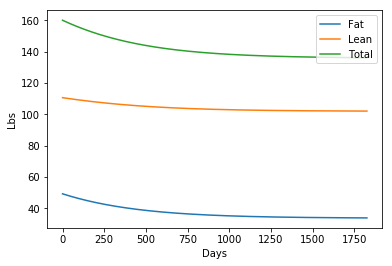

In [13]:
plt.plot(t, y[:,0], label='Fat')
plt.plot(t, y[:,1], label='Lean')
plt.plot(t, y[:,0] + y[:,1], label='Total')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Lbs')
plt.show()

### Problem 4

In [14]:
# Problem 4
# Initial conditions
age = 38
sex = 'I can put anything I want here'
height = in_to_m(5*12 + 8)
weight = lbs_to_kg(160)
PAL1 = 1.7
EI1 = 1600
PAL2 = 1.5
EI2 = 2025
t0 = 32 # Weeks
t = np.linspace(0,7*t0,700*t0)
F0 = fat_mass(weight, age, height, sex)
L0 = weight - F0
y0 = [F0 , L0]
y = np.zeros((len(t),len(y0)))
y[0,:] = y0

In [15]:
weight_ode1 = lambda t,y : weight_odesystem(t,y,EI1,PAL1)
weight_ode2 = lambda t,y : weight_odesystem(t,y,EI2,PAL2)
w_l_solver1 = ode(weight_ode1).set_integrator('dopri5')
w_l_solver2 = ode(weight_ode2).set_integrator('dopri5')
w_l_solver1.set_initial_value(y0,0)

In [16]:
for j in range(len(t)//2) :
    y[j,:] = w_l_solver1.integrate((t[j]))
print(y[len(t)//2-1,:])
w_l_solver2.set_initial_value(y[len(t)//2-1,:],t[len(t)//2-1])
for j in range(len(t)//2,len(t)) :
    y[j,:] = w_l_solver2.integrate((t[j]))

/anaconda/lib/python3.6/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


[ 15.34805169  46.26175514]


In [17]:
for i in range(len(t)) :
    y[i,0] = kg_to_lbs(y[i,0])
    y[i,1] = kg_to_lbs(y[i,1])

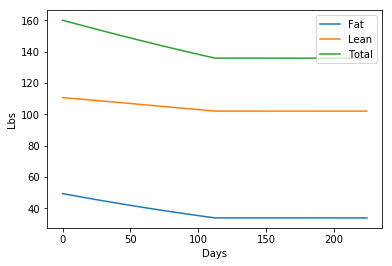

In [18]:
plt.plot(t, y[:,0], label='Fat')
plt.plot(t, y[:,1], label='Lean')
plt.plot(t, y[:,0] + y[:,1], label='Total')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Lbs')
plt.show()

### Problem 5

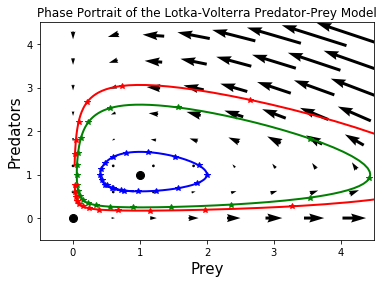

In [19]:
from scipy.integrate import odeint
a, b = 0., 13.                   # (Nondimensional) Time interval for one period 
alpha = 1. / 3                   # Nondimensional parameter
dim = 2                          # dimension of the system
y0 = np.array([1 / 2., 3 / 4.])  # initial conditions (1)
y1 = np.array([1 / 16., 3 / 4.]) #initial conditions (2)
y2 = np.array([1 / 40., 3/ 4.])

# Note: swapping order of arguments to match the calling convention
# used in the built in IVP solver.
def Lotka_Volterra(y, x):
    return np.array([y[0] * (1. - y[1]), alpha * y[1] * (y[0] - 1.)])
subintervals = 200
# Using the built in ode solver
Y_1 = odeint(Lotka_Volterra, y0, np.linspace(a, b, subintervals))
Y_2 = odeint(Lotka_Volterra, y1, np.linspace(a, b, subintervals))
Y_3 = odeint(Lotka_Volterra, y2, np.linspace(a, b, subintervals))
# Plot the direction field
Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True, copy=False)
U, V = Lotka_Volterra((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U[::3, ::3], V[::3, ::3], pivot='mid', color='k', units='dots',width=3.)
# Plot the 2 Equilibrium points
plt.plot(1, 1, 'ok', markersize=8)
plt.plot(0, 0, 'ok', markersize=8)
# Plot the solution in phase space
plt.plot(Y_1[:,0], Y_1[:,1], '-b', linewidth=2.0)
plt.plot(Y_1[::10,0], Y_1[::10,1], '*b')
plt.plot(Y_2[:,0], Y_2[:,1], '-g', linewidth=2.0)
plt.plot(Y_2[::10,0], Y_2[::10,1], '*g')
plt.plot(Y_3[:,0], Y_3[:,1], '-r', linewidth=2.0)
plt.plot(Y_3[::10,0], Y_3[::10,1], '*r')
plt.axis([-.5, 4.5, -.5, 4.5])
plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model")
plt.xlabel('Prey',fontsize=15)
plt.ylabel('Predators',fontsize=15)
plt.show()

Put some reasoning here.

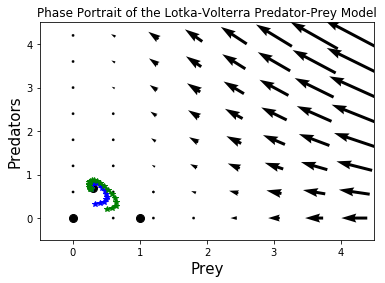

In [20]:
a, b = 0., 13.                   # (Nondimensional) Time interval for one period 
alpha = 1.                       # Nondimensional parameter
beta = .3
dim = 2                          # dimension of the system
y0 = np.array([1 / 3., 1 / 3.])  # initial conditions (1)
y1 = np.array([1 / 2., 1 / 5.])  # initial conditions (2)

def Lotka_Volterra_Adjusted(y, x):
    return np.array([y[0] * (1. - y[0] - y[1]), alpha * y[1] * (y[0] - beta)])
subintervals = 200
# Using the built in ode solver
Y_1 = odeint(Lotka_Volterra_Adjusted, y0, np.linspace(a, b, subintervals))
Y_2 = odeint(Lotka_Volterra_Adjusted, y1, np.linspace(a, b, subintervals))
# Plot the direction field
Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True, copy=False)
U, V = Lotka_Volterra_Adjusted((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U[::3, ::3], V[::3, ::3], pivot='mid', color='k', units='dots',width=3.)
# Plot the 3 Equilibrium points
plt.plot(0, 0, 'ok', markersize=8)
plt.plot(1,0, 'ok', markersize=8)
plt.plot(beta, 1-beta, 'ok', markersize=8)
# Plot the solution in phase space
plt.plot(Y_1[:,0], Y_1[:,1], '-b', linewidth=2.0)
plt.plot(Y_1[::10,0], Y_1[::10,1], '*b')
plt.plot(Y_2[:,0], Y_2[:,1], '-g', linewidth=2.0)
plt.plot(Y_2[::10,0], Y_2[::10,1], '*g')
plt.axis([-.5, 4.5, -.5, 4.5])
plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model")
plt.xlabel('Prey',fontsize=15)
plt.ylabel('Predators',fontsize=15)
plt.show()

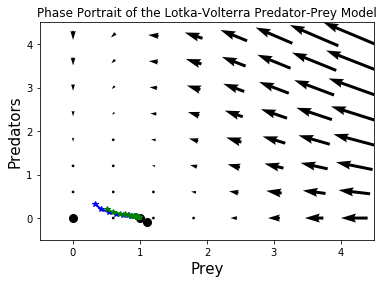

In [21]:
a, b = 0., 13.                   # (Nondimensional) Time interval for one period 
alpha = 1.                       # Nondimensional parameter
beta = 1.1
dim = 2                          # dimension of the system
y0 = np.array([1 / 3., 1 / 3.])  # initial conditions (1)
y1 = np.array([1 / 2., 1 / 5.])  # initial conditions (2)

def Lotka_Volterra_Adjusted(y, x):
    return np.array([y[0] * (1. - y[0] - y[1]), alpha * y[1] * (y[0] - beta)])
subintervals = 200
# Using the built in ode solver
Y_1 = odeint(Lotka_Volterra_Adjusted, y0, np.linspace(a, b, subintervals))
Y_2 = odeint(Lotka_Volterra_Adjusted, y1, np.linspace(a, b, subintervals))
# Plot the direction field
Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True, copy=False)
U, V = Lotka_Volterra_Adjusted((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U[::3, ::3], V[::3, ::3], pivot='mid', color='k', units='dots',width=3.)
# Plot the 3 Equilibrium points
plt.plot(0, 0, 'ok', markersize=8)
plt.plot(1,0, 'ok', markersize=8)
plt.plot(beta, 1-beta, 'ok', markersize=8)
# Plot the solution in phase space
plt.plot(Y_1[:,0], Y_1[:,1], '-b', linewidth=2.0)
plt.plot(Y_1[::10,0], Y_1[::10,1], '*b')
plt.plot(Y_2[:,0], Y_2[:,1], '-g', linewidth=2.0)
plt.plot(Y_2[::10,0], Y_2[::10,1], '*g')
plt.axis([-.5, 4.5, -.5, 4.5])
plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model")
plt.xlabel('Prey',fontsize=15)
plt.ylabel('Predators',fontsize=15)
plt.show()